In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch

np.random.seed(42)


Functions to find rmse, psnr valus and apply gradient descent

In [14]:

def rmse_psnr(orig_img,pred_img):
  # print(orig_img)
  # print(pred_img)
  diff = np.array(orig_img-pred_img)
  rmse = np.mean(diff**2) ** 0.5
  max_pixel = 255
  psnr = 20 * np.log10(max_pixel / rmse)
  return rmse,psnr


def gradient_descent(U, V, original_image, alpha, epochs):
    N, r = U.shape
    for epoch in range(epochs):
        predicted_image = np.dot(U, V)

        grad_U = -2 * np.dot((original_image - predicted_image), V.T)
        grad_V = -2 * np.dot(U.T, (original_image - predicted_image))

        U -= alpha * grad_U
        V -= alpha * grad_V

    return U, V




Image import

torch.Size([3, 750, 1061])


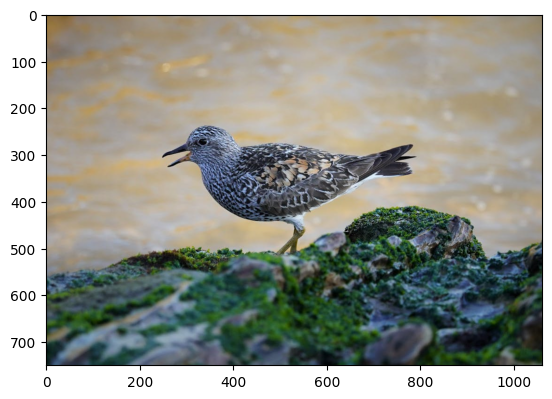

In [15]:

img = torchvision.io.read_image("image.jpeg")
print(img.shape)
plt.imshow(img.permute(1,2,0))



Image turned to 50 X 50

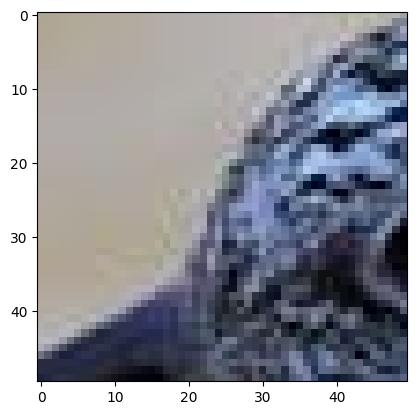

In [16]:

c_img = torchvision.transforms.functional.crop(img, 240,280, 50, 50)
plt.imshow(c_img.permute(1,2,0))
original_image = c_img


In [17]:
original_image.shape

torch.Size([3, 50, 50])

Below is the code for grey scale image


In [18]:
# r_values = [5, 10, 25, 50]
# learning_rate = 0.00001
# epochs = 50000

# rmse_results = []
# psnr_results = []

# # Plot original image patch
# plt.figure(figsize=(10, 10))
# plt.subplot(1, len(r_values) + 1, 1)
# plt.imshow(original_image.permute(1, 2, 0).cpu().numpy())  # Converting to NumPy for plotting
# plt.title('Original Patch')

# # Loop over different rank values
# for i, r in enumerate(r_values):
#     height, width = original_image.shape[1], original_image.shape[2]

#     W_r = np.random.randn(height, r)
#     H_r = np.random.randn(r, width)

#     W_g = np.random.randn(height, r)
#     H_g = np.random.randn(r, width)

#     W_b = np.random.randn(height, r)
#     H_b = np.random.randn(r, width)

#     W_r, H_r = gradient_descent(W_r, H_r, original_image[0].cpu().numpy(), alpha=learning_rate, epochs=epochs)
#     W_g, H_g = gradient_descent(W_g, H_g, original_image[1].cpu().numpy(), alpha=learning_rate, epochs=epochs)
#     W_b, H_b = gradient_descent(W_b, H_b, original_image[2].cpu().numpy(), alpha=learning_rate, epochs=epochs)

#     predicted_image = np.zeros((3, height, width))
#     predicted_image[0] = np.dot(W_r, H_r)  # Red channel
#     predicted_image[1] = np.dot(W_g, H_g)  # Green channel
#     predicted_image[2] = np.dot(W_b, H_b)  # Blue channel

#     rmse, psnr_value = rmse_psnr(original_image.cpu().numpy(), predicted_image)
#     rmse_results.append(rmse)
#     psnr_results.append(psnr_value)

#     predicted_image_clipped = np.clip(predicted_image.transpose(1, 2, 0), 0, 1)

#     plt.subplot(1, len(r_values) + 1, i + 2)
#     plt.imshow(predicted_image_clipped)


#     plt.title(f"r={r}\nRMSE={rmse:.2f}\nPSNR={psnr_value:.2f} dB")

# plt.tight_layout()
# plt.show()

# for i, r in enumerate(r_values):
#     print(f"Rank: {r}, RMSE: {rmse_results[i]:.4f}, PSNR: {psnr_results[i]:.2f} dB")

C:\Users\Student\AppData\Local\Temp\ipykernel_45612\1881060075.py:16: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  grad_U = -2 * np.dot((original_image - predicted_image), V.T)
C:\Users\Student\AppData\Local\Temp\ipykernel_45612\1881060075.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  grad_U = -2 * np.dot((original_image - predicted_image), V.T)
C:\Users\Student\AppData\Local\Temp\ipykernel_45612\1881060075.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  grad_V = -2 * np.dot(U.T, (original_image - predicted_image))
C:\Users\Student\AppData\Local\Temp\ipykernel_45612\1881060075.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing 

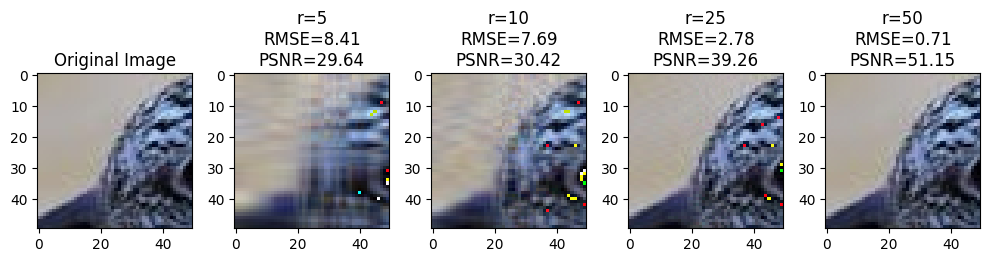

Rank: 5 , RMSE: 8.4060 , PSNR: 29.64 dB
Rank: 10 , RMSE: 7.6864 , PSNR: 30.42 dB
Rank: 25 , RMSE: 2.7778 , PSNR: 39.26 dB
Rank: 50 , RMSE: 0.7064 , PSNR: 51.15 dB


In [19]:

r_values = [5, 10, 25, 50]

learning_rate = 0.000005
epochs = 15000

rmse_results = []
psnr_results = []

plt.figure(figsize=(10, 10))
plt.subplot(1, len(r_values) + 1, 1)
plt.imshow(original_image.permute(1,2,0))
plt.title('Original Image')

for i, r in enumerate(r_values):
    N = original_image.shape[1]
    w_r = np.random.randn(N, r)
    h_r = np.random.randn(r, N)

    w_g = np.random.randn(N, r)
    h_g = np.random.randn(r, N)

    w_b = np.random.randn(N, r)
    h_b = np.random.randn(r, N)

    w_r, h_r = gradient_descent(w_r, h_r, original_image[0], alpha=learning_rate, epochs=epochs)
    w_g, h_g = gradient_descent(w_g, h_g, original_image[1], alpha=learning_rate, epochs=epochs)
    w_b, h_b = gradient_descent(w_b, h_b, original_image[2], alpha=learning_rate, epochs=epochs)

    predicted_image = np.stack([np.dot(w_r,h_r),np.dot(w_g,h_g), np.dot(w_b,h_b)], axis=2).astype(np.uint8)


    rmse,psnr = rmse_psnr(original_image.permute(1,2,0),predicted_image)
    rmse_results.append(rmse)
    psnr_results.append(psnr)

    plt.subplot(1, len(r_values) + 1, i + 2)
    plt.imshow(predicted_image)
    plt.title(f"r={r}\nRMSE={rmse:.2f}\nPSNR={psnr:.2f}")

plt.tight_layout()
plt.show()

for i, r in enumerate(r_values):
    print(f"Rank: {r} , RMSE: {rmse_results[i]:.4f} , PSNR: {psnr_results[i]:.2f} dB")


In [20]:
print(N)

50


In [21]:
predicted_image.shape

(50, 50, 3)

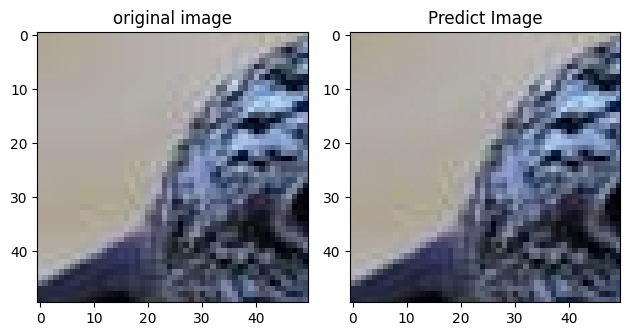

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(original_image.permute(1,2,0))
plt.title("original image")
plt.subplot(1, 2, 2)
plt.imshow(predicted_image)
plt.title("Predict Image")
plt.tight_layout()
plt.show()

In [23]:
rmse,psnr = rmse_psnr(original_image.permute(1,2,0),predicted_image)

C:\Users\Student\AppData\Local\Temp\ipykernel_45612\1881060075.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  diff = np.array(orig_img-pred_img)
C:\Users\Student\AppData\Local\Temp\ipykernel_45612\1881060075.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  diff = np.array(orig_img-pred_img)


In [24]:
print("RMSE and PSNR values are ")
print(f"rmse: {rmse} , psnr: {psnr}")


RMSE and PSNR values are 
rmse: 0.7064465065853653 , psnr: 51.14921797145189


From here we can see a general trend that by increasing the rank(upto certain limit) our Error(RMSE) is reduced and our PSNR(Peak signal-to-noise ratio) value is increasing.

The image with rank = 50 has very low error. We also have image size of 50 X 50. So the matrix multiplication is happening (to get predicted image) between W and H of size both 50 X 50. which is able to catch almost all the features of image.

Here our objective is to compress the image .
<br>
For compression,
<br>
2*N*r < N*N 
<br>
(W and H are of size (N,r) and (r,N) and image size (N,N))
<br>
for the above equation
<br>
r < N/2
<br>
In our case, N = 50
<br>
r < 25 (For image compression) 